# COMP47700 Speech and Audio PL3: Speech analysis and feature extraction
---
## Learning outcomes
This practical tutorial covers the following learning outcomes within the COMP47700 Speech and Audio module:
* Analyse speech and audio signals and features (**LO1**)
  * Carry out an analysis of speech wav files using spectrogram plots and varying key parameters like `offset`, `duration`, and `n_fft`.
* Articulate the characteristics of speech, speech production and speech understanding (**LO2**)
  * Compute the spectrum for speech signals and extract the frequency formants (F1 and F2) and the fundamental frequency (F0) using `librosa`.
* Describe the signal characteristics of speech and audio signals using appropriate terminology (**LO3**)
  * Visualise and explore the distribution of frequency formants (F1, F2)  and the fundamental frequency (F0) for different speech utterances.
* Create programmes to conduct experiments on speech and audio samples building on third software libraries (**LO6**)
  * Download and extract compressed datasets from an external source using Python libraries.
  * Setup and organise files for data analysis using `pandas` dataframes.

## Module topics
This practical tutorial builds on the following core topics:
* Speech production, characteristics of speech and structure of speech (Unit 3)
* How we hear, speech auditory perception (Unit 4)

## Why is this important?
After gaining familiarity with basic tools in Python to read, manipulate and generate audio and speech digital signals, this practical tutorial explores speech signals characteristics and speech production. A solid understanding of these concepts is foundational for developing effective and accurate applications in Python, particularly in the fields of speech processing, natural language processing, machine learning, and audio signal processing.

## Structure of this tutorial
This practical tutorial contains different sections:
* **Live coding:** Basic theory, demos and coding examples presented by the lecturer on site (unmarked)
* **Student activity:** Familiarisation and coding exercises to be completed by the students and followed by a short discussion on site (unmarked)
* **Assignment:** Three (3) take home problem/coding questions to be completed by the students and due in two (2) weeks from the day the practical tutorial is given. Assignment questions represent fifteen (15) mark points.

## Setup notes
We will be using Google Colabs for our labs but if you wish to run speech and audio projects locally (not recommended) you will need a manage your own Python environment setup with a number of important packages.

Some important libraries for this practical tutorial are:

* [numpy](https://numpy.org) is the fundamental package for scientific computing with Python. From a signal processing perspective it allow us to represent continuous signals as discrete digitally sampled time series.
* [matplotlib](https://matplotlib.org) is a plotting and data visualisation library. Pyplot is a Matplotlib module that allows MATLAB-like interface to the matplotlib library funtions. Practically speaking, this means that you can build up a figure plot step by step, e.g. create a figure, add axes, add data to plot, customise the title and axes labels and change to look of the figure.
* [librosa](librosa.github.io) is a Python package for music and audio processing. It allows handling audio files and provides tasks for spectral analysis, feature extraction, spectrogram visualization, etc.
* [fftpack](https://docs.scipy.org/doc/scipy/reference/fftpack.html) this package provides a set of functions for performing FFT operations on arrays in Python. The FFT is particularly useful for analyzing signals in the frequency domain, as it allows you to transform a time-domain signal into its frequency components.

---
### **Live coding:** Loading libraries and helper functions
Get our working environment ready and load helper functions.
1. Import the libraries (`fftpack, listdir`) and setup the notebook for magic plots.
2. Load the function `plotSpectrum` to help us plot the speech spectrum.

In [1]:
#Imports and Magic
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io, os
from scipy import fftpack
from os import listdir
import IPython.display as ipd
from google.colab import files
import zipfile
%matplotlib inline

`plotSpectrum` is just a helper function to allow us to plot the spectrum with labelled axes with a set range.

In [2]:

def plotSpectrum(freq,mag,fname):
    fig1, ax=plt.subplots(1)

    ax.plot(freq, mag, color='gray')
    plt.grid()
    plt.title(fname)
    plt.xlim((0,3000))
    plt.xlabel('Freq. (Hz)')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.savefig('plots/'+fname+'.png')

### **Live coding:** Collecting data from zipped file
1. From your local system, select the .zip file provided for PL3 (`PL3_files.zip`).
2. Use `zipfile` to extract the files to your Google Colab environment.

**Notes:** You can inspect the extracted folder (phonemes) in the files section at the table of contents.

In [3]:
zipname = 'PL3_files.zip'
uploaded = files.upload()

Saving PL3_files.zip to PL3_files.zip


In [4]:
# Extract the zip file
with zipfile.ZipFile(zipname, 'r') as zip_ref:
  zip_ref.extractall()  # Extract all files to the current directory

### **Live coding:** List files and setup dataframe
1. Load list of wav files for analysis (`listdir`)
2. Parse out word names and create dataframe columns (`split`)

In [5]:
basedir='./phonemes/'
phonemefilenames=listdir(basedir)
phonemenames=[]
formants=[[],[]]
phonemefilenames = [x for x in phonemefilenames if x.__contains__('.wav')] # remove non-wavfiles from list

# parse out the word names from the files by getting the text between the - and the .wav extn
phonemenames = [name.split('-')[-1].split('.')[0] for name in phonemefilenames]
speakerid = [name.split('-')[0].split('.')[0] for name in phonemefilenames]
dfformants=pd.DataFrame(columns=['speaker','word','f1','f2'])
dfformants['speaker']=speakerid
dfformants['word']=phonemenames

### **Live coding:** Data inspection
Before we do anything let's sanity check the data by looking at it and listening to it.
1. Load the wav files changing the `offset` and `duration` parameters (`librosa.load`)
2. Plot the corresponding spectrogram (`librosa.display.specshow`)
3. Instantiate playback widgets for playing the audio files.
**Note:** `offset`, start reading after this time (in seconds). `duration`, only loads up to this much audio (in seconds). `n_fft`, length of the windowed signal after padding with zeros. Default value is `n_fft = 2048` (well suited for music signals), for speech processing common value is `n_fft = 512`.

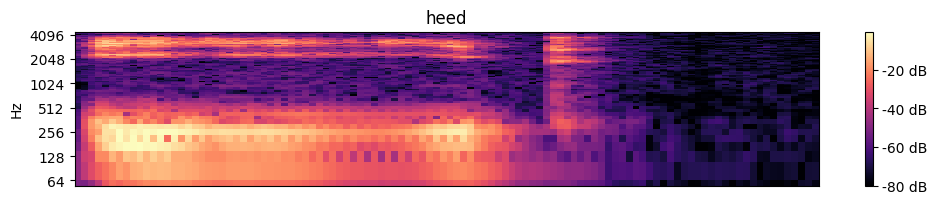

In [6]:
fileidx = 1
x_1, sr = librosa.load(basedir+phonemefilenames[fileidx],offset=.1, duration=.7)
plt.figure(figsize=(12, 2))
D1 = librosa.amplitude_to_db(np.abs(librosa.stft(x_1,n_fft=512)),  ref=np.max)
librosa.display.specshow(D1, y_axis='log')
plt.title(phonemenames[fileidx])
plt.ylim(50,4500)
plt.colorbar(format='%+2.0f dB')

ipd.Audio(x_1, rate=sr)

### **Student activity #1:** Spectrogram representation
* Load the wav files corresponding to the words **had, head, hid, hood,** and **whod** setting the `offset` and `duration` to 0.1 and 0.6 respectively.
* Adapt the code above to iteratively plot the spectrogram representations for the loaded words. Set the `n_fft` parameter to 256.
* Instantiate playback widgets for playing the audio files.

**Note:** To iteratively display playback widgets use the `IPython.display` method (e.g., `ipd.display(ipd.Audio(signal, rate))`).

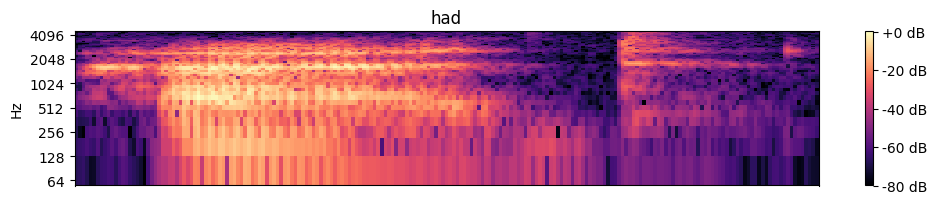

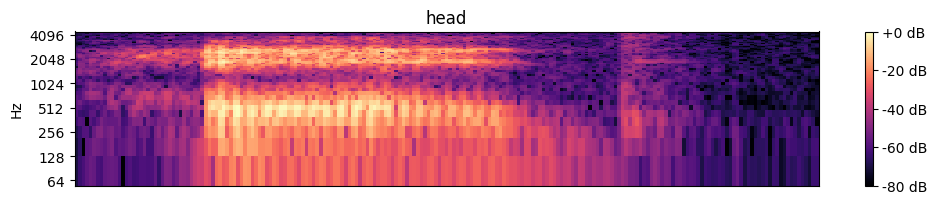

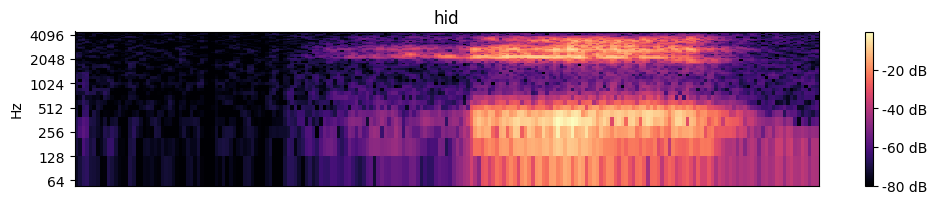

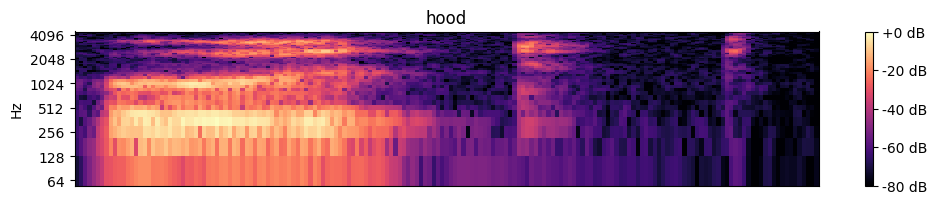

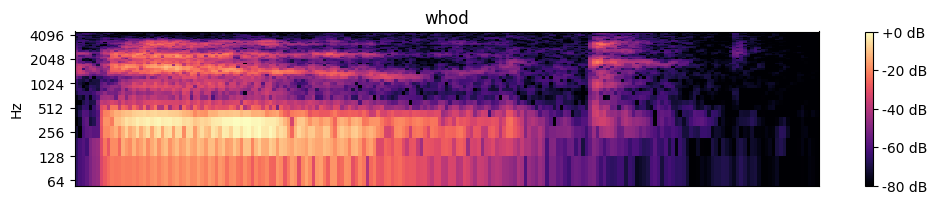

In [7]:
###############################
## Student activity solution #1
###############################

#for fileidx in [1,5]:
for phonemes in ['had','head','hid','hood','whod']:
  x_1, sr = librosa.load(basedir+'453353-'+phonemes+'.wav',offset=.1, duration=.6)
  plt.figure(figsize=(12, 2))
  D1 = librosa.amplitude_to_db(np.abs(librosa.stft(x_1,n_fft=256)),  ref=np.max)
  librosa.display.specshow(D1, y_axis='log')
  plt.title(phonemes)
  plt.ylim(50,4500)
  plt.colorbar(format='%+2.0f dB')
  # Playback
  ipd.display(ipd.Audio(x_1, rate=sr))

### **Live coding:** Extracting F1, F2
First we will create a new folder named **plots** using the `os.mkdir` method and the `try except` block for error handling.

In [8]:
try:
    os.mkdir('plots')
except OSError:
    print('plots directory already exists')

1. We will read the wav file for the word **"had"**. We do not need to process the entire file. All files start with a short silence and duration of 0.5 s will suffice.
2. We will use `fftpack.fft` to get the frequency spectrum components for the files. `fftpack.fftfreq` will give us the frequencies associated with the intensities.
3. We will use `plotSpectum` to save the plots into our **plots** sub directory.

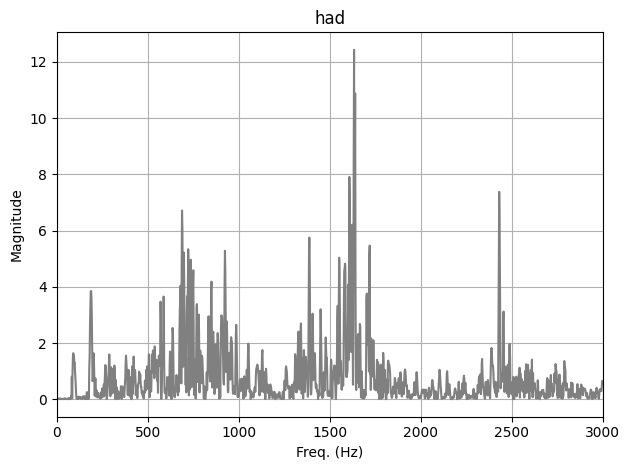

In [9]:
# Load file and organise spectrum components
name = 'had'
fname = '453353-had.wav'
x_1, fs = librosa.load(basedir+fname,duration=0.5)

X = fftpack.fft(x_1) #get the FFT intensities
freq=fftpack.fftfreq(len(x_1))*fs # get the corresponding frequencies
freqidx=int(len(freq)/2) # ignore the negitive mirror image of fft
freq=freq[1:freqidx] # get the freqs
mag=np.abs(X.real) # that the real absolute magnitudes
mag=mag[1:freqidx] # for the positive freqs
plotSpectrum(freq, mag, name)

4. We will use the librosa peakfinder `librosa.util.peak_pick` method to find the peaks in the signal.
5. Using the peak indexes we will create lists of the frequencies and magnitudes corresponding to those peaks. We will use them to populate a data frame.

In [10]:
#use librosa peak_pick utility to find peaks
indexes = librosa.util.peak_pick(mag, pre_max=3, post_max=3, pre_avg=3, post_avg=5, delta=0.1, wait=1)

peaks=[freq[indexes],mag[indexes]]

peaksdf=pd.DataFrame(peaks).T
peaksdf.columns=['freq','mag']
peaksdf

,freq,mag
0,90.0,1.637866
1,166.0,0.253844
2,188.0,3.849643
3,202.0,1.634118
4,212.0,0.739918
...,...,...
172,3110.0,0.426377
173,3120.0,0.798275
174,3148.0,0.508839
175,3314.0,0.197464


6. Using the rough approximation from the graph we introduced in the lecture, we make the assumption that $250 \leq F1 \leq 650$ and $650 \leq F2 \leq 2600$.
6. Using the `between` and `idxmax()` methods we will find the F1 and F2 values.
7. We will print the word and their corresponding F1 and F2 values.

Word: had 
 F1: 586.00 
 F2: 1634.00


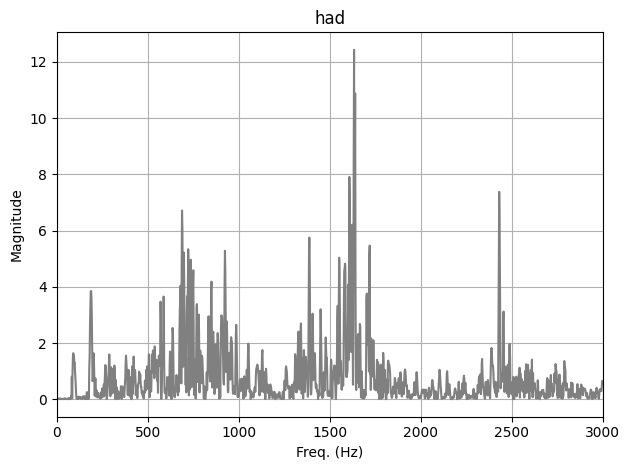

In [11]:
# find the first and second formant:
# first formant is max peak between ~ 250 and  650 Hz
# second formant is max peak between ~ 650 and 2600 Hz

fmin = 250
f1max=650
f2max=3000
peaksdf=pd.DataFrame(peaks).T # Create a dataframe and transpose rows to cols
peaksdf.columns=['freq','mag']    # label them
f1peaks=peaksdf[peaksdf.freq.between(fmin,f1max)] #get the frequencies in formant 1 freq range
f1=f1peaks['freq'][f1peaks['mag'].idxmax()] #get the freq for the index of the max amp in this range

f2peaks=peaksdf[peaksdf.freq.between(f1max,f2max)] #get the frequencies in formant 1 freq range
f2=f2peaks['freq'][f2peaks['mag'].idxmax()] #get the freq for the index of the max amp in this range

print('Word: had \n F1: {:.2f} \n F2: {:.2f}'.format(f1,f2))
plotSpectrum(freq, mag, name)

### **Student activity #2:** Computing speech spectrum and extracting F1 and F2 for multiple files
* Use the **phonemefilenames** list and the method `enumerate` to iteratively load all files in the list. Set the `offset` and `duration` to 0.1 and 0.6 respectively.
* Adapt the code above to iteratively plot the spectrum and compute F1 and F2 values for all files in the **phonemefilenames** list.
* Insert F1 and F2 values into the dataframe we created earlier (**dfformants**) and save that to a csv file (**speakerformants.csv**).

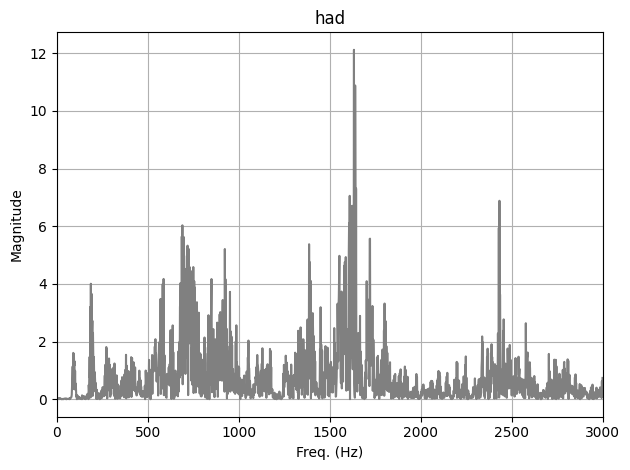

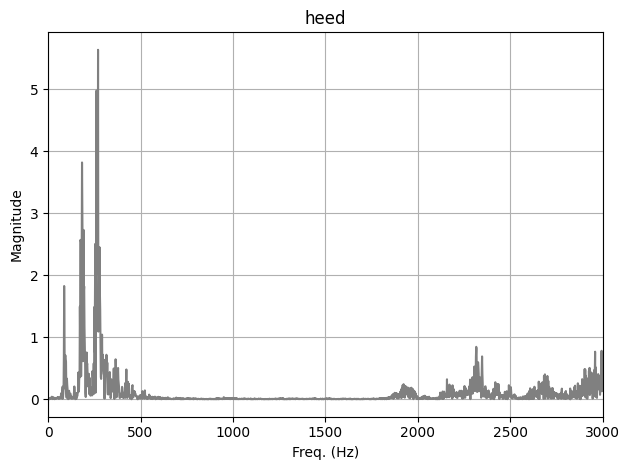

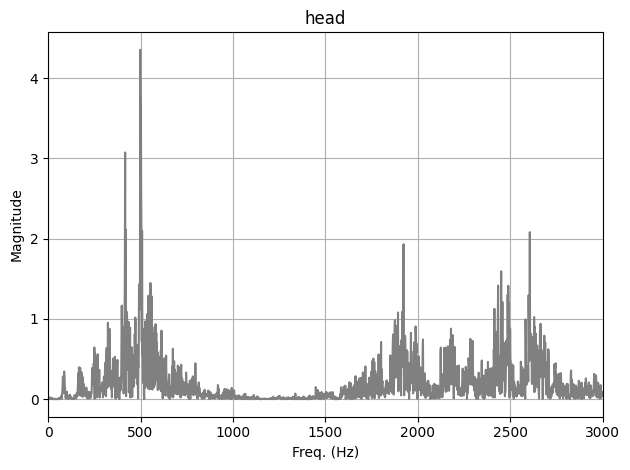

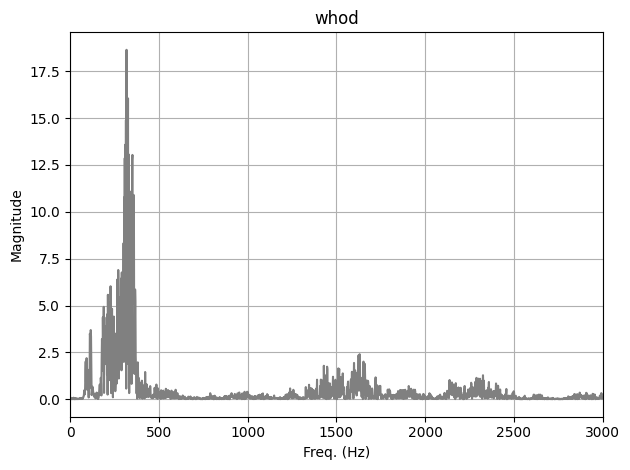

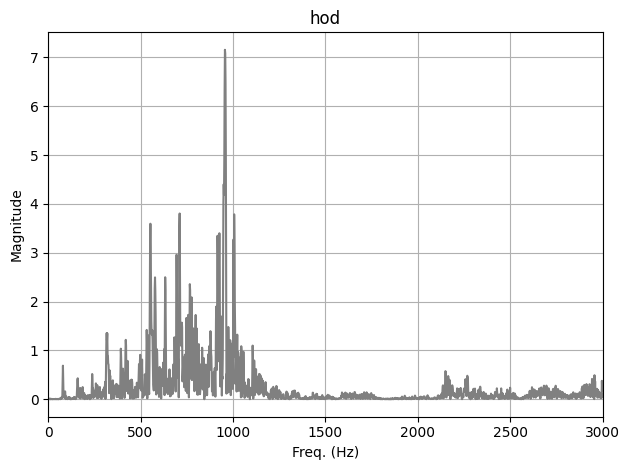

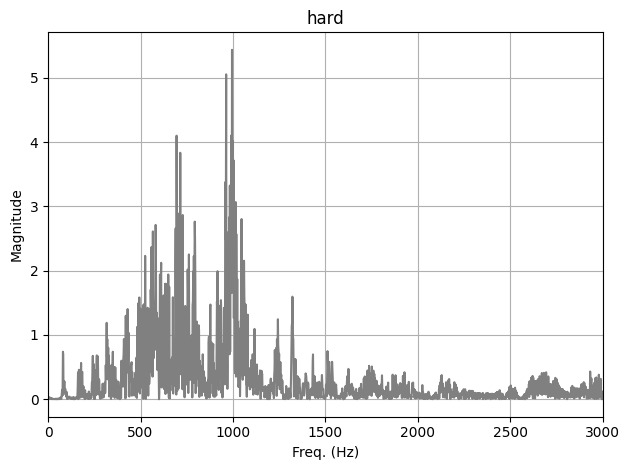

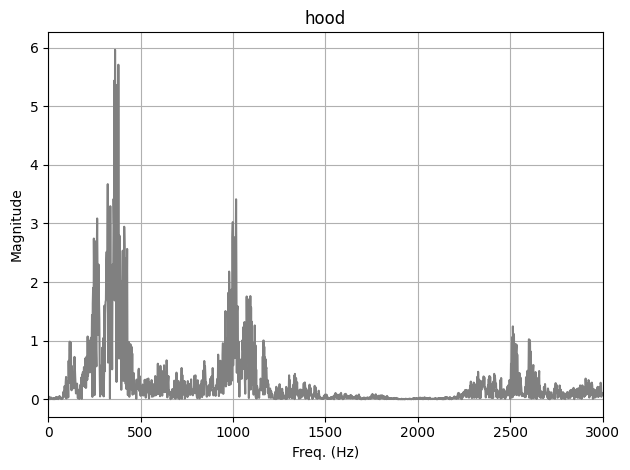

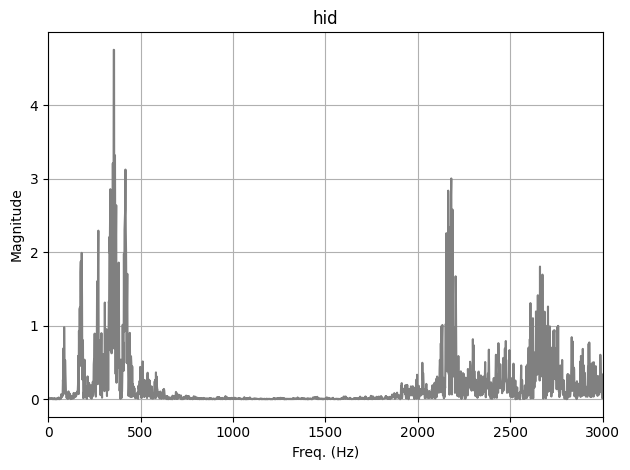

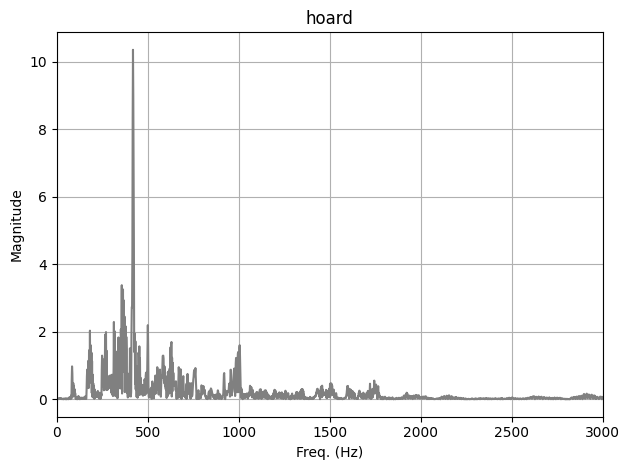

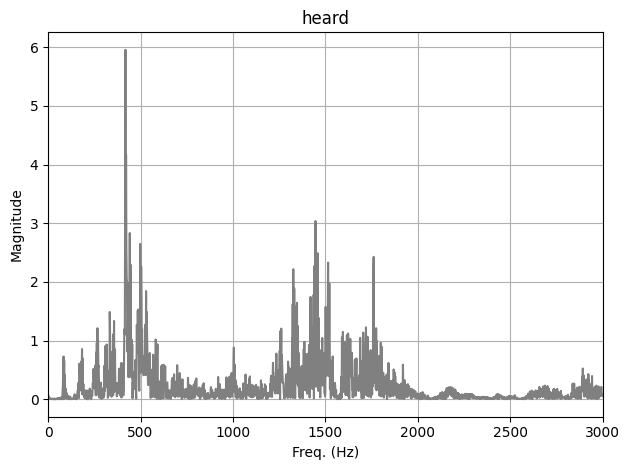

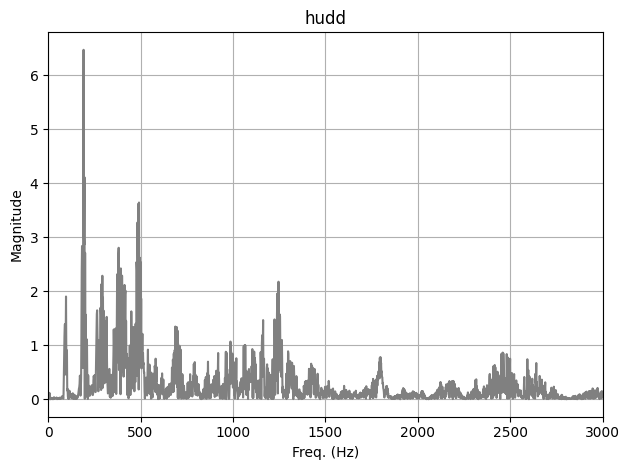

In [12]:
###############################
## Student activity solution #2
###############################


formants=[[],[]]

for idx,fname in enumerate(phonemefilenames):
      x_1, fs = librosa.load(basedir+fname,duration=0.6, offset=.1)
      X = fftpack.fft(x_1) #get the FFT intensities
      freq=fftpack.fftfreq(len(x_1))*fs # get the corresponding frequencies
      freqidx=int(len(freq)/2) # ignore the negitive mirror image of fft
      freq=freq[1:freqidx] # get the freqs
      mag=np.abs(X.real) # that the real absolute magnitudes
      mag=mag[1:freqidx] # for the positive freqs

      # Plot spectrum
      plotSpectrum(freq, mag, phonemenames[idx])

      #use librosa pick utility to find peaks
      indexes = librosa.util.peak_pick(mag, pre_max=3, post_max=3, pre_avg=3, post_avg=5, delta=0.1, wait=1)
      peaks=[freq[indexes],mag[indexes]]
      peaksdf=pd.DataFrame(peaks).T
      peaksdf.columns=['freq','mag']

      # find the first and second formant:
      # first formant is max peak between ~ 250 and  650 Hz
      # second formant is max peak between ~ 650 and 2600 Hz

      fmin = 250
      f1max=650
      f2max=3000
      peaksdf=pd.DataFrame(peaks).T # Create a dataframe and transpose rows to cols
      peaksdf.columns=['freq','mag']    # label them
      f1peaks=peaksdf[peaksdf.freq.between(fmin,f1max)] #get the frequencies in formant 1 freq range
      f1=f1peaks['freq'][f1peaks['mag'].idxmax()] #get the freq for the index of the max amp in this range

      f2peaks=peaksdf[peaksdf.freq.between(f1max,f2max)] #get the frequencies in formant 1 freq range
      f2=f2peaks['freq'][f2peaks['mag'].idxmax()] #get the freq for the index of the max amp in this range

      formants[0].append(f1)
      formants[1].append(f2)


dfformants['f1']=formants[0]
dfformants['f2']=formants[1]


dfformants.to_csv('speakerformants.csv')

### **Live coding:** Vowel F1/F2 visualization
Using the extracted F1 and F2 values we will generate a scatter plot for all words in the **dfformants** data frame.
1. Using the `scatter` method we will plot **-(F2-F1)** vs **F1** for all words.
2. We will annotate the names for each word in the scatter plot.
3. We will save the figure in the **plots** sub diresctory as **vowelf1f2male453353.png**
4. We will print the **dfformants** data frame to inspect our plot and the F1 and F2 values.

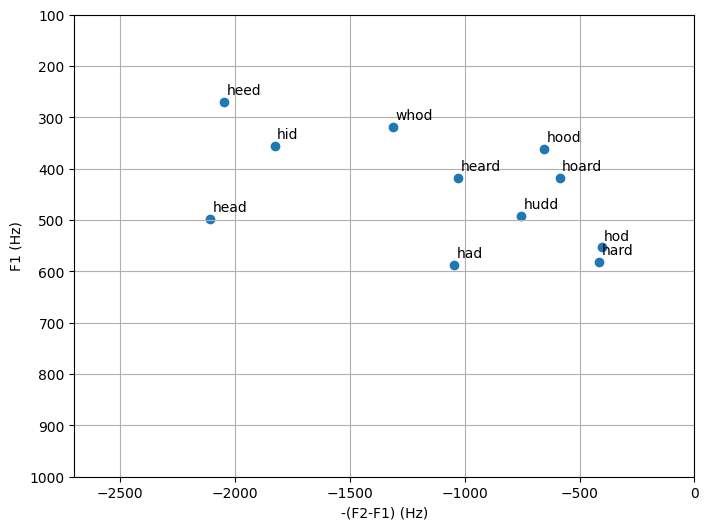

In [13]:
fig1=plt.figure(figsize=(8, 6))
ax2=fig1.add_subplot(111)
plt.scatter(-(dfformants['f2']-dfformants['f1']),dfformants['f1'])

for idx, phonemename in enumerate(phonemenames):
    ax2.annotate(phonemename,  xy=(-(formants[1][idx]-formants[0][idx])+10,formants[0][idx]-15))

plt.xlim((-2700, 0))
plt.ylim((1000, 100))
plt.grid(axis='both')
plt.xlabel('-(F2-F1) (Hz)')
plt.ylabel('F1 (Hz)')

plt.savefig('plots/vowelf1f2male453353.png')
plt.show()

In [14]:
dfformants

,speaker,word,f1,f2
0,453353,had,586.666667,1633.333333
1,453353,heed,270.000000,2316.666667
2,453353,head,498.333333,2606.666667
3,453353,whod,318.333333,1631.666667
4,453353,hod,553.333333,956.666667
5,453353,hard,581.666667,995.000000
6,453353,hood,362.091709,1017.022613
7,453353,hid,355.000000,2181.666667
8,453353,hoard,418.333333,1005.000000
9,453353,heard,418.333333,1446.666667


### **Live coding:** Computing the Fundamental Frequency (F0)

* Describes the tone of the voice (roughly in the range 80 to 450 Hz).
* Closely related to pitch, F0 describes the actual physical phenomenon, whereas pitch describes how our ears and brains interpret the signal.
* `librosa` provides the `pyin` function to compute F0 using a modified version of the YIN algorithm.

Reference:
* [Introduction to Speech Processing](https://speechprocessingbook.aalto.fi/)
* [Mauch, Matthias, and Simon Dixon. “pYIN: A fundamental frequency estimator using probabilistic threshold distributions.” 2014 IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP). IEEE, 2014.](https://www.eecs.qmul.ac.uk/~simond/pub/2014/MauchDixon-PYIN-ICASSP2014.pdf)

<ipython-input-15-5449e1cf51fe>:2: DeprecationWarning: Please use `nan` from the `scipy.signal` namespace, the `scipy.signal.waveforms` namespace is deprecated.
  from scipy.signal.waveforms import nan


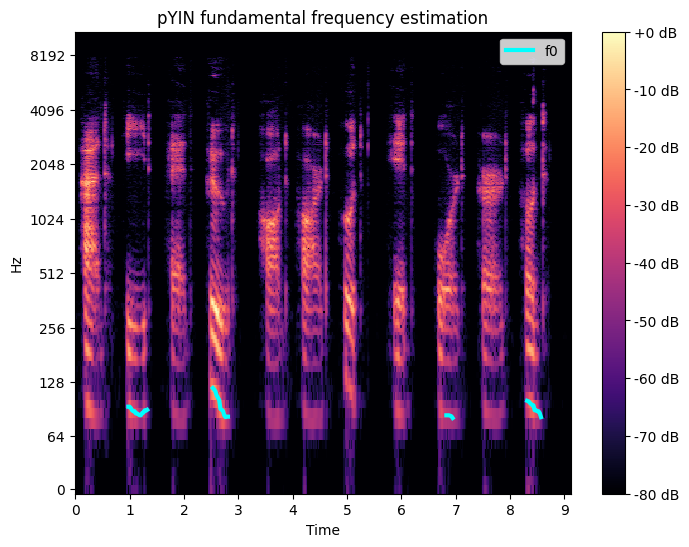

In [15]:
#from pandas.core.internals.concat import concat_arrays
from scipy.signal.waveforms import nan
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
import scipy

#create a single sample array containing all the words
concat_words_y=np.array([])
for idx,fname in enumerate(phonemefilenames):
    y, sr = librosa.load(basedir+fname)
    concat_words_y=np.append(concat_words_y,y)
y=concat_words_y

#run pyin to estimate pitch/f0

f0, voiced_flag, voiced_probs = librosa.pyin(y, sr=sr,
                                          fmin=80,
                                          fmax=450)
# Pitch range for humans is 70-900 Hz (Heylen et al., 2002)

times = librosa.times_like(f0)

# plot the spectro and overlay the pitch estimate

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots(figsize=(8, 6))
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

Compute the average f0 (pitch) from the non-nan pitch estimates.

In [16]:
f0nonan=f0[np.logical_not(np.isnan(f0))]
f0mean=np.mean(f0nonan)
print(f0mean)

91.0944537989726


---
# Assignment Questions PL3

Upload files from local system provided for this assignment (`PL3_files_assignment.zip`)

In [ ]:
from google.colab import files
zipname = 'PL3_files_assignment.zip'
uploaded = files.upload()

In [ ]:
import zipfile
# Extract the zip file
with zipfile.ZipFile(zipname, 'r') as zip_ref:
  zip_ref.extractall()  # Extract all files to the current directory

### Part 1 [3 pts]

**File handling, create programmes to conduct experiments on speech and audio samples.** Create your own set of words. Record yourself saying these 11 words Leaving a pause between each word:
  - hid
  - hood
  - head
  - whod
  - heed
  - hudd
  - hod
  - had
  - heard
  - hard
  - hoard

Break it up into 11 wav files and save them as 16 bit mono wav recordings (you can either use Python to break and create the files or use another method, e.g., Audacity). Follow this format for naming the 11 wav files: **452352-\<phonemename\>.wav.** The `452352` corresponds to the 6 digit code and will be used as the speaker id. Your wav files should look like this: `452352-hid.wav`, `452352-hood.wav`, etc. Create a folder `phonemes_student` and store the 11 wav files there. Upload this folder to your Colab environment.


**Note:** Remember to attach your `phonemes_student` folder as a zip file when you submit your assignment at Brightspace.

In [ ]:
##################################
## Assignment question solution #1
##################################


### Part 2 [3 pts]

**Articulate the characteristics of speech and speech production.** Locate the three folders containing the sets of words: `phonemes`, `synthetic`, `phonemes_student` in your Colab environment. Parse out word names and create dataframe columns for all files. Similarly to what was done in PL3, your dataframe should have these columns: `["speaker", "word", "F1", "F2"]`. Update columns "speaker" and "word" with the corresponding information from all three words sets. Calculate F1 and F2 values for the three sets of words in your dataframe and update columns "F1" and "F2" with those values. **[3 pts]**

**Note:** Set the `offset` and `duration` to 0.1 and 0.6 respectively.

In [ ]:
##################################
## Assignment question solution #2
##################################


### Part 3 [3 pts]

**Describe the signal characteristics of speech.** Plot F1 vs -(F2-F1) for the three sets of words: 1) original set of words, 2) synthetic set of words, and 3) your own voice recordings. Set different colours for each speaker. Add a text annotation with the phoneme word (as done in PL3). **[3 pts]**

In [ ]:
##################################
## Assignment question solution #3
##################################


### Part 4 [3 pts]

**Analyse speech and audio signals and features.** Compare the plotted points for each of the three sets of words and answer the following questions:
  - Do the points for the multiple utterances of the same word cluster together? **[1 pt]**
  - Do the points for synthetic utterances cluster together with natural utterances? **[1 pt]**
  - Does the original utterances clustered with yours? **[1 pt]**

In [ ]:
##################################
## Assignment question solution #4
##################################

### Part 5 [3 pts]

**Articulate the characteristics of speech and speech production.** As done in PL3, concatenate the words for all three sets. You should have three sets of words (`phonemes`, `synthetic`, and `phonemes_student`). Run `pyin` to estimate pitch/f0 for each set of words (speaker). Plot the spectro and overlay the pitch estimate. Compute the average pitch from the non-nan pitch estimates. **[3 pts]**

In [ ]:
##################################
## Assignment question solution #5
##################################